## Fourier Transformation

연속 함수 $f(t)$의 Fourier Transformation은 다음과 같이 정의한다

$$\[ F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} \, dt \]$$

여기서 $F(ω)$는 주파수 $ω$에서의 Fourier Transformation이고, $f(t)$는 시간 도메인에서의 원래 함수이다. $e ^{−iωt}$ 는 복소수 지수 함수로, $i$는 허수, $t$는 시간 변수, $ω$는 각 주파수(rad/s)이다. Fourier 변환을 사용하면, 

금융 데이터의 특정 주파수 성분을 분석하여 시장의 주기성을 파악하거나, 특정 주파수 대역의 노이즈를 제거할 수 있다. 주파수 도메인에서 데이터를 분석함으로써, 시간 도메인에서는 보이지 않는 중요한 정보를 발견할 수 있다. 

한편, Fourier 변환의 역변환을 통해, 주파수 도메인에서의 수정된 데이터를 다시 시간 도메인으로 변환할 수 있다.

### 푸리에 역변환

Fourier 변환의 역변환은 다음과 같이 정의한다

$$\[ f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \, d\omega \]$$

Fourier 변환과 역변환의 관계를 증명하기 위해 $f(t)$의 Fourier 변환 $F(ω)$를 다시 시간 도메인으로 변환하는 과정을 살펴본다.

$$\[ F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} \, dt \]$$

$F(ω)$의 역변환을 구하여 $f(t)$를 얻는다

$$\[ f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \, d\omega \]$$

$F(ω)$를 대입하면

$$\[ f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \left( \int_{-\infty}^{\infty} f(\tau) e^{-i \omega \tau} \, d\tau \right) e^{i \omega t} \, d\omega \]$$

여기서 $\tau$는 통합변수를 나타낸다. 이를 정리하면

$$\[ f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} f(\tau) \left( \int_{-\infty}^{\infty} e^{-i \omega (\tau - t)} \, d\omega \right) d\tau \]$$

내부 적분은 디랙 델타 함수 $\delta (\tau - t)$로 정리할 수 있다

$$\[ \int_{-\infty}^{\infty} e^{-i \omega (\tau - t)} \, d\omega = 2\pi \delta(\tau - t) \]$$

이를 이용하면 원래 함수 $f(t)$를 구할 수 있다

$$\[ f(t) = \int_{-\infty}^{\infty} f(\tau) \delta(\tau - t) \, d\tau \]$$

따라서 푸리에 변환과 역변환의 관계가 성립한다.

$$\[ f(t) = f(t) \]$$

### 이산 푸리에 변환

한편, 금융시장에서의 가격은 이산적인 형태임으로 연속 모형을 이산 모형으로 바꿔야 한다

$$\[ X_k = \sum_{n=0}^{N-1} x_n e^{-i \frac{2\pi}{N} k n} \]$$

$$\[ x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k e^{i \frac{2\pi}{N} k n} \]$$

### Spectral Analysis

스펙트럴 분석은 신호나 시계열 데이터의 주파수 성분을 분석하는 방법이다. 주로 데이터가 어떤 주파수 성분을 포함하고 있는지, 주기적인 패턴이나 노이즈가 있는지 등을 파악하기 위해 사용된다. 금융 시계열 데이터 분석에서 스펙트럴 분석은 주가, 거래량 등의 주기적 변동을 분석하고 예측하는 데 유용하다.

$$\[ P(\omega) = |F(\omega)|^2 \]$$

In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

START_DATE = '1999-12-01'
END_DATE = pd.to_datetime('today')
TICKER = '^GSPC'

data = yf.download(
    TICKER,
    start = START_DATE,
    end = END_DATE,
    progress = False,
    interval = '1mo'
)

ret_price = data['Close'].pct_change().dropna()

In [27]:
from scipy.signal import periodogram

frequencies, spectrum = periodogram(ret_price, scaling='density')

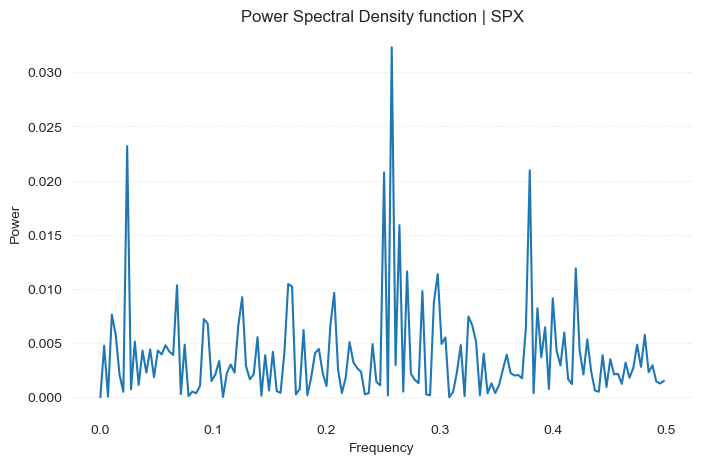

In [28]:
fig, ax = plt.subplots(figsize = (8, 5))
plt.plot(
    frequencies,
    spectrum
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.title(r'Power Spectral Density function | SPX')
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

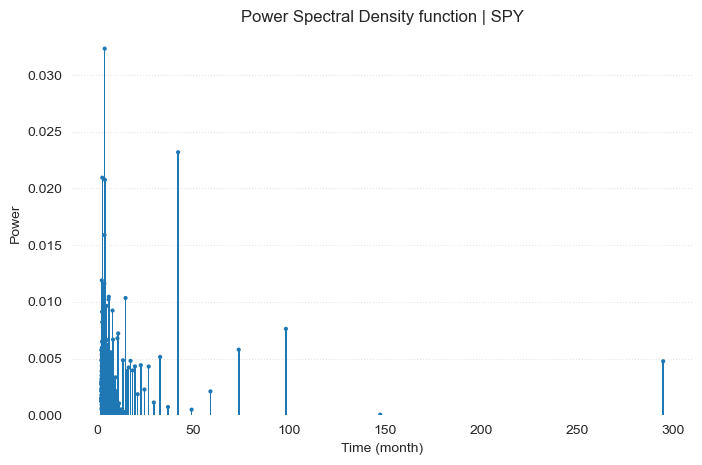

In [35]:
fig, ax = plt.subplots(figsize = (8, 5))
plt.bar(
    1 / frequencies[1:],
    spectrum[1:],
    edgecolor = 'none'
)
plt.scatter(
    1 / frequencies[1:],
    spectrum[1:],
    edgecolor = 'none',
    marker = '.',
    color = 'tab:blue'
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.title(r'Power Spectral Density function | SPY')
plt.xlabel("Time (month)")
plt.ylabel("Power")
plt.show()